In [ ]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Splitting
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

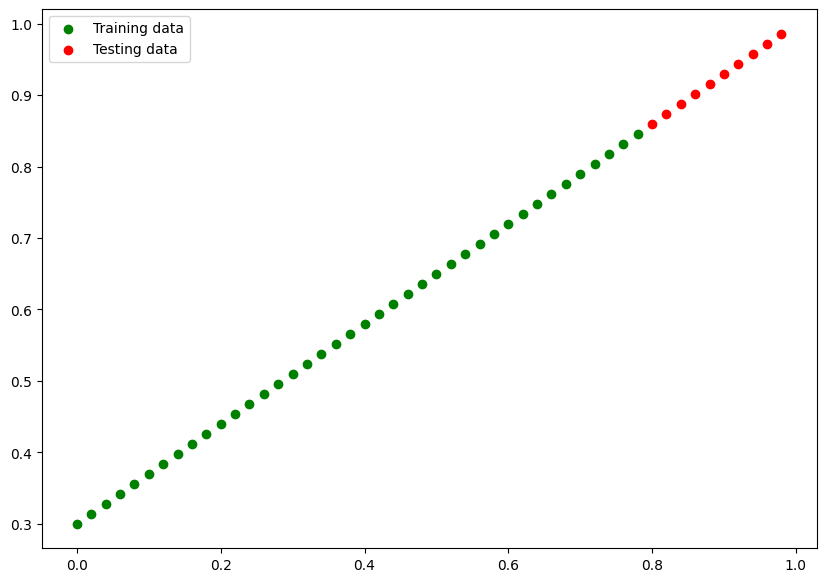

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))


  plt.scatter(train_data, train_labels, c="g", label="Training data")


  plt.scatter(test_data, test_labels, c="r",  label="Testing data")


  if predictions is not None:

    plt.scatter(test_data, predictions, c="b", label="Predictions")

  plt.legend(prop={"size": 10})

plot_predictions(X_train, y_train,X_test, y_test)
plt.show()

In [ ]:
# Model building
class Lregression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float ))
    self.bias =  nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float ))
  def forward(self, x : torch.Tensor) -> torch.Tensor :
    return self.weights* x.T + self.bias

In [ ]:
model = Lregression()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.4534], requires_grad=True),
 Parameter containing:
 tensor([0.5708], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.4534])), ('bias', tensor([0.5708]))])

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)


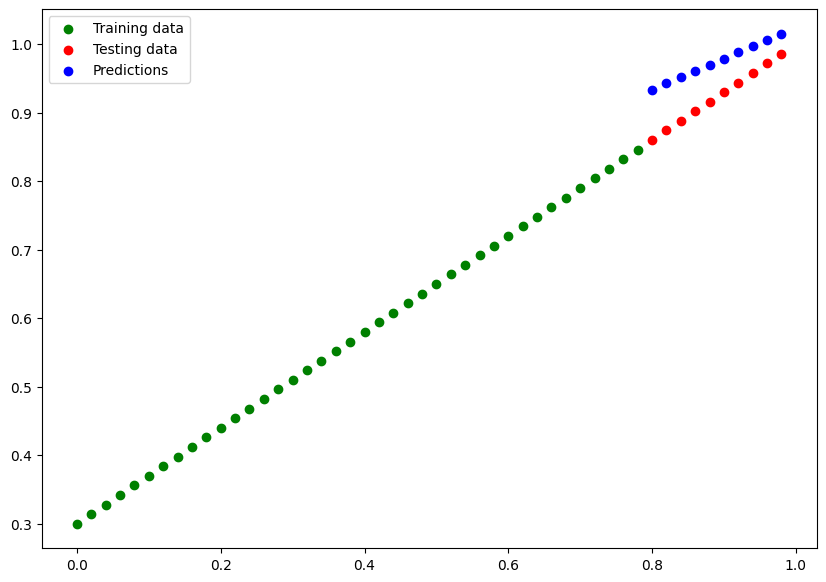

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
loss_fn = torch.nn.L1Loss()

opt_fn = torch.optim.SGD(params = model.parameters(),lr = 0.01)

In [ ]:


epoch = 101
epoch_count = []
loss_count = []
test_loss = []
for epochs in range(epoch):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred,y_train)

  opt_fn.zero_grad()

  loss.backward()

  opt_fn.step()

  model.eval()

  with torch.inference_mode():

    y_pred_test = model(X_test)

    loss_test = loss_fn(y_pred_test,y_test)

    if epochs % 10 == 0:
      epoch_count.append(epochs)
      loss_count.append(loss)
      test_loss.append(loss_test)
      print(f"Epoch {epochs} | Loss: {loss} |Test Loss:{loss_test}|")





Epoch 0 | Loss: 0.14099325239658356 |Test Loss:0.3003797233104706|
Epoch 10 | Loss: 0.14095860719680786 |Test Loss:0.3011960983276367|
Epoch 20 | Loss: 0.14092454314231873 |Test Loss:0.3021385371685028|
Epoch 30 | Loss: 0.14089496433734894 |Test Loss:0.30276593565940857|
Epoch 40 | Loss: 0.14086541533470154 |Test Loss:0.30341118574142456|
Epoch 50 | Loss: 0.14083604514598846 |Test Loss:0.30406445264816284|
Epoch 60 | Loss: 0.1408080905675888 |Test Loss:0.30479976534843445|
Epoch 70 | Loss: 0.14078183472156525 |Test Loss:0.30543166399002075|
Epoch 80 | Loss: 0.14075614511966705 |Test Loss:0.3061341345310211|
Epoch 90 | Loss: 0.140732079744339 |Test Loss:0.306872695684433|
Epoch 100 | Loss: 0.1407085508108139 |Test Loss:0.3074934482574463|


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3308])), ('bias', tensor([0.4406]))])

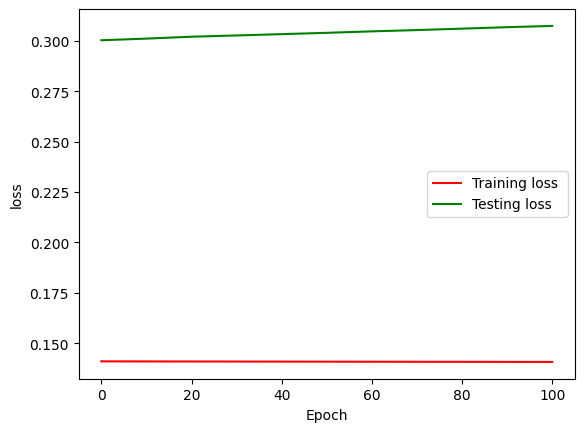

In [ ]:
# plotting training and test curves

plt.plot(epoch_count,torch.tensor(loss_count).numpy(),c="r",label = "Training loss ")
plt.plot(epoch_count,torch.tensor(test_loss).numpy(),c="g", label = "Testing loss")

plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

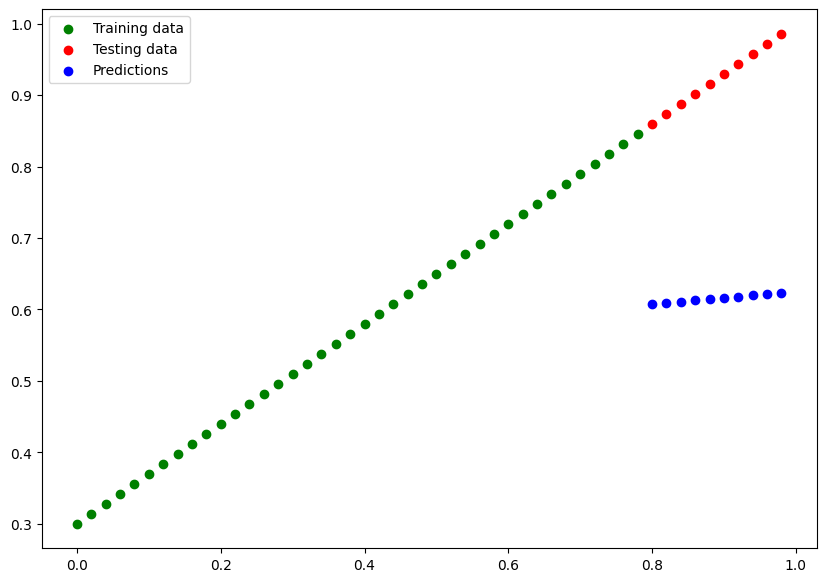

In [ ]:
plot_predictions(predictions = y_pred_test)

In [ ]:
# saving a model
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name = "Model_0_pytorch_LR.pt"
model_path_ = model_path / model_name

torch.save(
    obj = model,
    f = model_path_
)

In [ ]:
model_1 = torch.load(model_path_)